# Decision Trees and Random Forests in Python

Reference: http://net-informations.com/ds/mla/dtree.htm, https://www.kaggle.com/code

Credit (Image) from https://www.osmosis.org/learn/Lordosis,_kyphosis,_and_scoliosis

![](https://d16qt3wv6xm098.cloudfront.net/D8vzGbPOSmitZdUZkrleQYi-SZ6ZFOpZ/_.jpg)

# Install this package before starting this lab

## Import Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

In [27]:
!wget --no-check-certificate https://github.com/davidjohnnn/all_datasets/raw/master/bay/kyphosis.csv

--2025-10-21 15:15:30--  https://github.com/davidjohnnn/all_datasets/raw/master/bay/kyphosis.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/davidjohnnn/all_datasets/master/bay/kyphosis.csv [following]
--2025-10-21 15:15:30--  https://raw.githubusercontent.com/davidjohnnn/all_datasets/master/bay/kyphosis.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1430 (1.4K) [text/plain]
Saving to: ‘kyphosis.csv.3’

kyphosis.csv.3      100%[===================>]   1.40K  --.-KB/s    in 0s      

2025-10-21 15:15:30 (25.7 MB/s) - ‘kyphosi

In [28]:
df = pd.read_csv('kyphosis.csv')

In [29]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

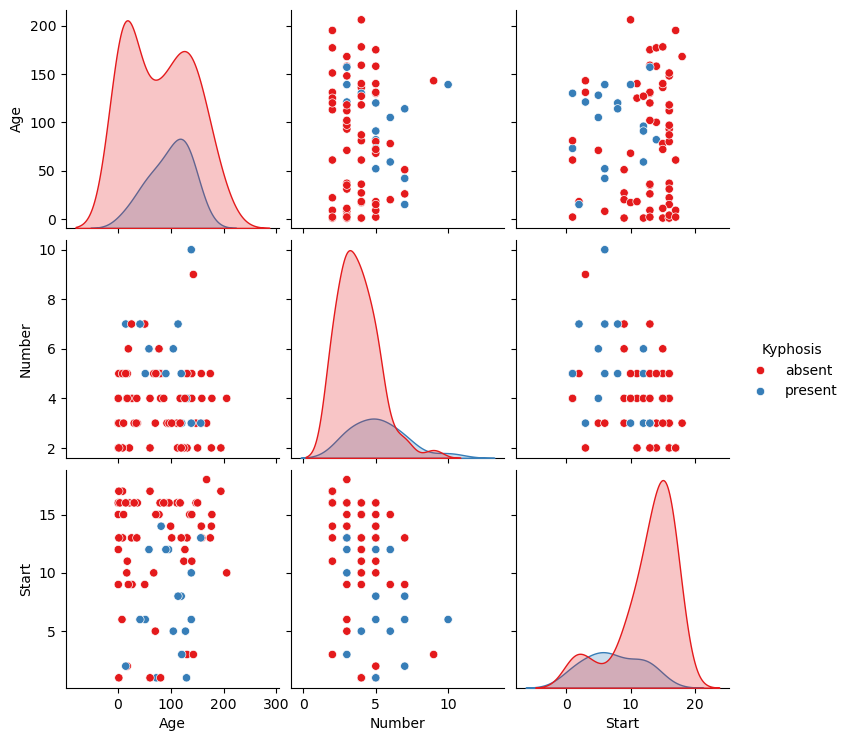

In [30]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=30)

## Decision Trees

We'll start just by training a single decision tree.

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtree = DecisionTreeClassifier(min_samples_leaf=10, criterion='entropy')

In [36]:
dtree.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [37]:
import pickle
filename = 'model.sav'
pickle.dump(dtree, open(filename, 'wb'))

## Prediction and Evaluation

Let's evaluate our decision tree.

In [38]:
dtree = pickle.load(open(filename,'rb'))
dtree

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [39]:
important = pd.Series(dtree.feature_importances_, index=X_train.columns)
important

Age       0.345528
Number    0.000000
Start     0.654472
dtype: float64

In [40]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [41]:
dtree.get_depth()

3

In [42]:
dtree.get_n_leaves()

np.int64(4)

In [43]:
predictions = dtree.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test,predictions,digits=4))

              precision    recall  f1-score   support

      absent     0.9000    0.9000    0.9000        20
     present     0.6000    0.6000    0.6000         5

    accuracy                         0.8400        25
   macro avg     0.7500    0.7500    0.7500        25
weighted avg     0.8400    0.8400    0.8400        25



In [50]:
print(confusion_matrix(y_test,predictions,labels=['absent','present']))

[[18  2]
 [ 2  3]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

[Text(0.6, 0.875, 'x[2] <= 14.5\nentropy = 0.75\nsamples = 56\nvalue = [44, 12]'),
 Text(0.4, 0.625, 'x[0] <= 38.5\nentropy = 0.928\nsamples = 35\nvalue = [23, 12]'),
 Text(0.5, 0.75, 'True  '),
 Text(0.2, 0.375, 'entropy = 0.439\nsamples = 11\nvalue = [10, 1]'),
 Text(0.6, 0.375, 'x[0] <= 123.0\nentropy = 0.995\nsamples = 24\nvalue = [13, 11]'),
 Text(0.4, 0.125, 'entropy = 0.985\nsamples = 14\nvalue = [6, 8]'),
 Text(0.8, 0.125, 'entropy = 0.881\nsamples = 10\nvalue = [7, 3]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.7, 0.75, '  False')]

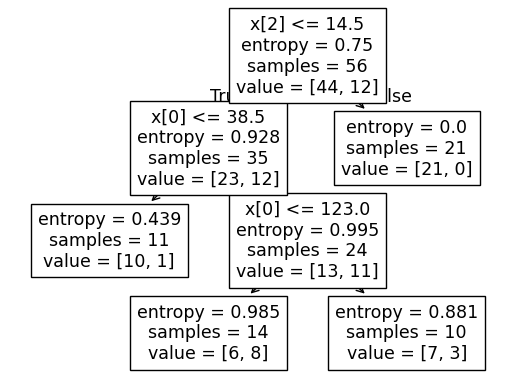

In [47]:
from sklearn import tree
tree.plot_tree(dtree)

In [48]:
print(X.columns) # feature names
print(y.unique().tolist()) # class names

Index(['Age', 'Number', 'Start'], dtype='object')
['absent', 'present']


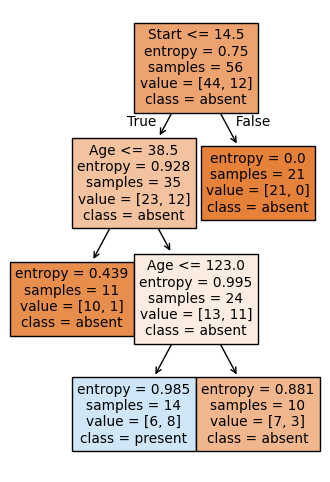

In [49]:
fn=X.columns # feature names
cn=y.unique().tolist() # class names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,6), dpi=100)
tree.plot_tree(dtree,
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')